In [174]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
print("Number of Unique elements in the Dataset: ")
for i in df.columns:
    print(f'{i} has {df[i].nunique()} Unique elements in the {i} column')

Number of Unique elements in the Dataset: 
letter has 26 Unique elements in the letter column
xbox has 16 Unique elements in the xbox column
ybox has 16 Unique elements in the ybox column
width has 16 Unique elements in the width column
height has 16 Unique elements in the height column
onpix has 16 Unique elements in the onpix column
xbar has 16 Unique elements in the xbar column
ybar has 16 Unique elements in the ybar column
x2bar has 16 Unique elements in the x2bar column
y2bar has 16 Unique elements in the y2bar column
xybar has 16 Unique elements in the xybar column
x2ybar has 16 Unique elements in the x2ybar column
xy2bar has 16 Unique elements in the xy2bar column
xedge has 16 Unique elements in the xedge column
xedgey has 16 Unique elements in the xedgey column
yedge has 16 Unique elements in the yedge column
yedgex has 16 Unique elements in the yedgex column


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [5]:
# There are no Null values present in the dataset.

In [6]:
df.duplicated().sum()

1332

In [7]:
df_duplicates = df[df.duplicated()]
df_duplicates

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [8]:
# Looks like there is no new information from these duplicates. Lets drop these duplicates.

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
# We are done with missing values and duplicates.

In [11]:
# Lets start with Data Preprocessing

In [12]:
le = LabelEncoder()
# df_1 = df.copy
df['letter'] = le.fit_transform(df['letter'])
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,19,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [13]:
X = df.drop(columns = 'letter')
y = df['letter']

In [14]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

In [16]:
X.columns = df.columns[1:]
X

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,-1.144417,0.237070,-1.178294,-0.232716,-1.231474,0.531756,2.358246,-1.746100,0.344235,-0.953149,1.351557,0.035798,-1.347535,-0.223412,-1.494712,0.130096
1,0.451855,1.491943,-1.178294,0.685459,-0.768617,1.515924,-1.090370,0.158195,-0.517819,1.882192,-1.315513,0.510429,-0.486890,-0.223412,0.079965,1.336868
2,-0.080235,1.178224,0.372167,1.144546,1.082808,1.515924,-0.659293,-0.984382,0.344235,0.667046,-1.315513,-0.438833,-0.056568,-0.858409,-0.313704,0.733482
3,1.516037,1.178224,0.372167,0.226371,-0.305761,-0.944497,0.633938,-0.222664,0.344235,-1.763246,-0.934503,0.985060,1.234399,1.046582,-0.707373,0.130096
4,-1.144417,-1.958957,-1.178294,-2.069066,-1.231474,0.531756,-0.659293,0.539054,0.344235,-0.953149,-0.553493,0.510429,-0.917213,-0.858409,0.473635,1.336868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,0.451855,0.237070,0.888987,0.685459,1.545665,0.039671,0.633938,-0.222664,1.206289,-0.548100,0.208527,0.035798,-0.056568,1.046582,1.654643,-1.076676
18664,-1.144417,-1.645239,-1.178294,-1.150891,-0.768617,0.039671,-0.228216,0.919913,0.344235,-0.953149,-0.172483,-1.862725,-0.486890,-0.223412,-0.313704,-0.473290
18665,1.516037,0.864506,1.405808,1.144546,0.157095,-1.436582,0.202861,0.539054,1.637317,1.477143,0.970547,2.408953,-0.486890,0.411585,-0.313704,-0.473290
18666,0.983946,0.550788,0.372167,0.685459,0.619952,-0.452413,1.496092,-0.603523,0.775262,1.072095,0.970547,-1.388094,-0.486890,2.316576,-0.707373,-2.283449


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=897)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14934, 16)
(3734, 16)
(14934,)
(3734,)


In [ ]:
# We are now done with training and testing data.

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [153]:
model = Sequential([tf.keras.layers.Dense(16,activation='relu'),
                  Dense(20,activation='relu'),
                  Dense(26,activation='sigmoid')])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history1 = model.fit(X_train,y_train,epochs=30,batch_size=160,validation_split=0.2)

Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.0367 - loss: 3.2566 - val_accuracy: 0.1212 - val_loss: 3.0465
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1552 - loss: 2.9532 - val_accuracy: 0.2541 - val_loss: 2.6347
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3094 - loss: 2.4762 - val_accuracy: 0.4510 - val_loss: 2.0624
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4928 - loss: 1.9267 - val_accuracy: 0.5413 - val_loss: 1.6466
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5648 - loss: 1.5565 - val_accuracy: 0.6023 - val_loss: 1.4204
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6258 - loss: 1.3276 - val_accuracy: 0.6411 - val_loss: 1.2859
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6561 - loss: 1.2121 - val_accuracy: 0.6645 - val_loss: 1.1963
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6687 - loss: 1.1378 - val_accuracy: 0.6753 - val_loss

In [155]:
test_loss,test_accuracy = model.evaluate(X_test,y_test)
print(f"accuracy of the model is {test_accuracy}")

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7700 - loss: 0.7529
accuracy of the model is 0.7806641459465027


In [43]:
# We got 83% accuracy which is really good. Our model is working very well.

In [45]:
# Lets build a model with 2 hidden layers and compare the accuracy.

In [53]:
model2 = Sequential([tf.keras.layers.Dense(16,activation='relu'),
                  Dense(20,activation='relu'),
                  Dense(15,activation='tanh'),
                  Dense(26,activation='sigmoid')])
model2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model2.fit(X_train,y_train,epochs=100,batch_size=160,validation_split=0.2)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0474 - loss: 3.2781 - val_accuracy: 0.1553 - val_loss: 3.0156
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1910 - loss: 2.8996 - val_accuracy: 0.2698 - val_loss: 2.5545
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3146 - loss: 2.4295 - val_accuracy: 0.4078 - val_loss: 2.1645
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4481 - loss: 2.0701 - val_accuracy: 0.4948 - val_loss: 1.8961
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5283 - loss: 1.8068 - val_accuracy: 0.5514 - val_loss: 1.7062
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5688 - loss: 1.6297 - val_accuracy: 0.5752 - val_loss: 1.5727
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6032 - loss: 1.4951 - val_accuracy: 0.6023 - val_loss: 1.4733
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6257 - loss: 1.3936 - val_accuracy: 0.6254 - 

In [55]:
test_loss2,test_accuracy2 = model2.evaluate(X_test,y_test)
print(f"accuracy of the model is {test_accuracy2}")

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8380 - loss: 0.5229
accuracy of the model is 0.8427959084510803


In [61]:
y_test_pred = model.predict(X_test)

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [129]:
y_test_pred_labels = [np.argmax(i) for i in y_test_pred]
# to get predicted values for the data.

In [139]:
df_cmp = pd.DataFrame()
df_cmp['y_test'] = y_test
df_cmp['labels_pred'] = y_test_pred_labels
df_cmp

,y_test,labels_pred
8153,12,12
7023,6,6
2868,21,21
3834,14,14
5646,6,6
...,...,...
136,18,18
11482,16,16
18551,0,0
10648,9,9


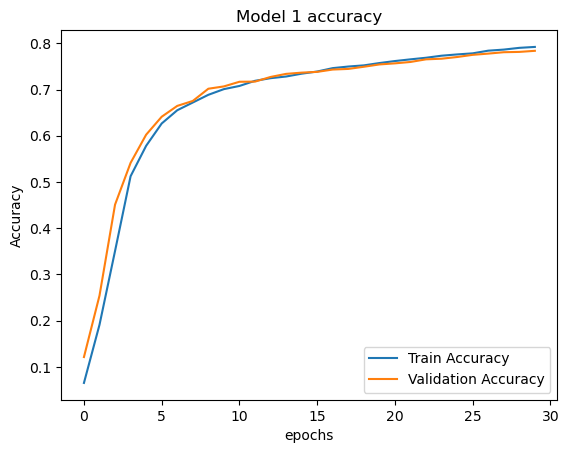

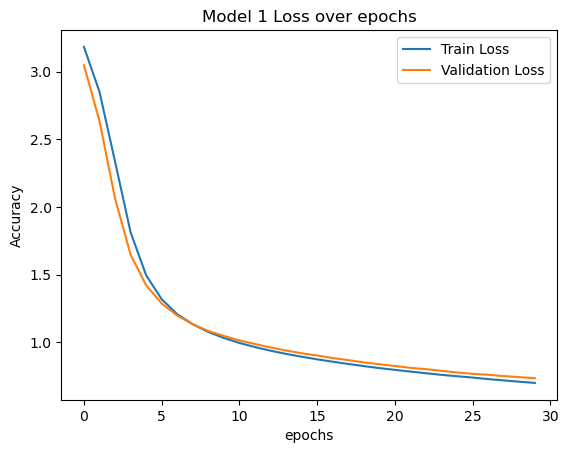

In [159]:
plt.plot(history1.history['accuracy'],label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1 accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history1.history['loss'],label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model 1 Loss over epochs')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

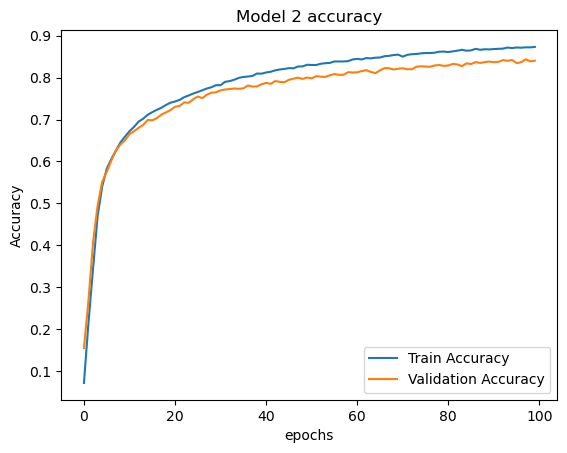

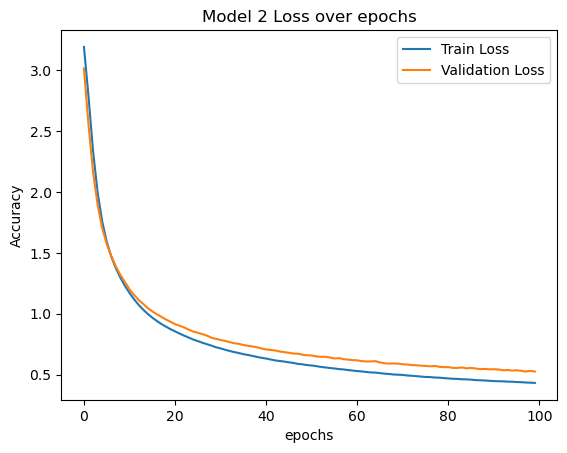

In [161]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model 2 Loss over epochs')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [163]:
# As we can see there is a slight improvement in the model performance.

# Hyperparameter Tuning

In [171]:
import keras_tuner as kt

# Set dimensions
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

# Define model-building function
def build_model(hp):
    model = keras.Sequential([
        keras.layers.Dense(
            units=hp.Int('units', min_value=16, max_value=128, step=16),
            activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid']),
            input_shape=(num_features,)
        ),
        keras.layers.Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])
        ),
        loss='sparse_categorical_crossentropy',  # Use sparse format for integer labels
        metrics=['accuracy']
    )
    return model

In [173]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='keras_tuner_dir',
    project_name='alphabet_ann'
)

# Run the tuner
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate on test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Best Tuned Test Accuracy:", test_accuracy)

Trial 5 Complete [00h 00m 34s]
val_accuracy: 0.4914630055427551

Best val_accuracy So Far: 0.8473384380340576
Total elapsed time: 00h 02m 50s


C:\Users\saich\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\saich\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8385 - loss: 0.5156
Best Tuned Test Accuracy: 0.8419924974441528


In [178]:
tuner.search(X_train,y_train,epochs=50,validation_split=0.2)

In [180]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"best hyperparameters={best_hyperparameters.values}")

best hyperparameters={'units': 64, 'activation': 'sigmoid', 'dropout': 0.30000000000000004, 'learning_rate': 0.01}


In [185]:
best_model = tuner.hypermodel.build(best_hyperparameters)
best_model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3449 - loss: 2.3134 - val_accuracy: 0.6990 - val_loss: 1.1005
Epoch 2/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6424 - loss: 1.1822 - val_accuracy: 0.7415 - val_loss: 0.8891
Epoch 3/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6960 - loss: 0.9869 - val_accuracy: 0.7790 - val_loss: 0.7669
Epoch 4/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7190 - loss: 0.8836 - val_accuracy: 0.7981 - val_loss: 0.6725
Epoch 5/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7414 - loss: 0.8190 - val_accuracy: 0.8152 - val_loss: 0.6178
Epoch 6/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7549 - loss: 0.7614 - val_accuracy: 0.8309 - val_loss: 0.5820
Epoch 7/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7690 - loss: 0.7255 - val_accuracy: 0.8303 - val_loss: 0.5528
Epoch 8/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7678 - loss: 0.7068 - val_accu

In [191]:
train_loss, train_accuracy = best_model.evaluate(xtrain, ytrain)
print(f"Train Accuracy: {train_accuracy:.2f}")

test_loss, test_accuracy = best_model.evaluate(xtest, ytest)
print(f"Test Accuracy: {test_accuracy:.2f}")

467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9324 - loss: 0.2093
Train Accuracy: 0.93
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9012 - loss: 0.3163
Test Accuracy: 0.91


In [193]:
# After performing keras tuner to find best parameters we got an accuracy of 91% which is really very good.

# Evaluation

In [197]:
from sklearn.metrics import accuracy_score

y_pred=best_model.predict(X_test).argmax(axis=1)
test_accuracy=accuracy_score(y_test,y_pred)
print("Test accuracy",test_accuracy)

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test accuracy 0.9057311194429566


In [224]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='macro')  # Use 'macro' or 'weighted'
print(f"Precision: {precision:.2f}")

Precision: 0.91


In [218]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.3f}")

Recall: 0.907


In [222]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.9058


# ●	Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.